# Project Model Klasifikasi

In [25]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

## Data Understanding

### Load Data

In [2]:
from google.colab import files

# Upload file secara manual
uploaded = files.upload()

Saving cirrhosis.csv to cirrhosis.csv


In [6]:
file_path = "cirrhosis.csv"
df = pd.read_csv(file_path)
print(tabulate(df, headers='keys', tablefmt='grid'))

+-----+------+----------+----------+-----------------+-------+-------+-----------+----------------+-----------+---------+-------------+---------------+-----------+----------+------------+--------+-----------------+-------------+---------------+---------+
|     |   ID |   N_Days | Status   | Drug            |   Age | Sex   | Ascites   | Hepatomegaly   | Spiders   | Edema   |   Bilirubin |   Cholesterol |   Albumin |   Copper |   Alk_Phos |   SGOT |   Tryglicerides |   Platelets |   Prothrombin |   Stage |
+=====+======+==========+==========+=================+=======+=======+===========+================+===========+=========+=============+===============+===========+==========+============+========+=================+=============+===============+=========+
|   0 |    1 |      400 | D        | D-penicillamine | 21464 | F     | Y         | Y              | Y         | Y       |        14.5 |           261 |      2.6  |      156 |     1718   | 137.95 |             172 |         190 |       

### Eksplorasi Data

In [7]:
selected_column = df[['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides','Platelets', 'Prothrombin', 'Stage']]
summary = selected_column.agg(['mean', lambda x: x.mode().iloc[0],'median', 'std', 'min', 'max'])
summary.index = summary.index.to_series().replace('<lambda>', 'modus')

#Menampilkan hasil dalam bentuk tabel rapi
from tabulate import tabulate
print(tabulate(summary, headers='keys', tablefmt='pretty'))

+--------+--------------------+--------------------+--------------------+---------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|        |        Age         |     Bilirubin      |    Cholesterol     |       Albumin       |      Copper       |      Alk_Phos      |        SGOT        |   Tryglicerides    |     Platelets      |    Prothrombin     |       Stage        |
+--------+--------------------+--------------------+--------------------+---------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  mean  | 18533.351674641148 | 3.2208133971291866 | 369.51056338028167 | 3.4974401913875592  | 97.64838709677419 | 1982.6557692307692 | 122.55634615384616 | 124.70212765957447 | 257.02457002457004 | 10.731730769230769 | 3.0242718446601944 |
| modus  |      19724.0       | 

### Visualisasi Data Setiap Kolom

#### Age

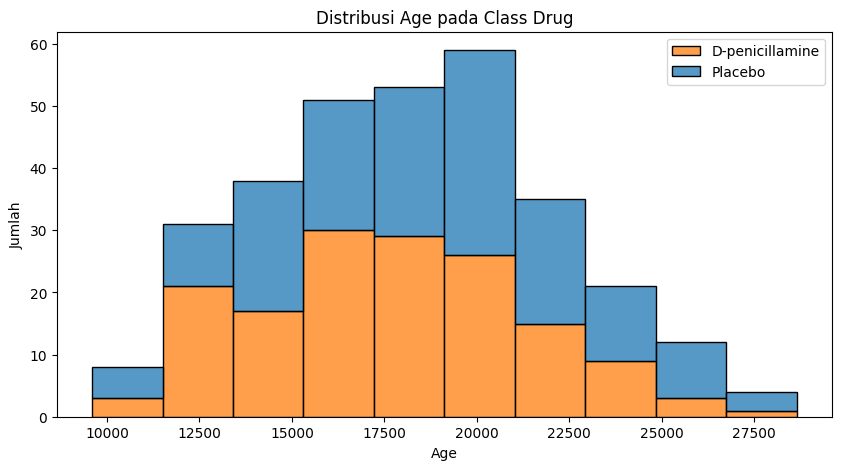

In [10]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="Age", hue="Drug", multiple="stack", kde=False, bins=10)

plt.title("Distribusi Age pada Class Drug")
plt.xlabel("Age")
plt.ylabel("Jumlah")
handles, labels = ax.get_legend_handles_labels()
custom_labels = ["D-penicillamine", "Placebo"]
plt.legend(custom_labels, title="")

plt.show()

#### Bilirubin

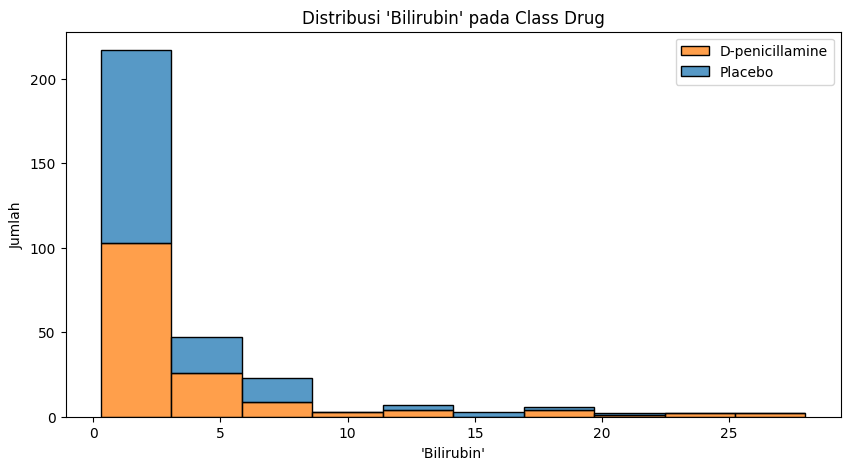

In [12]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="Bilirubin", hue="Drug", multiple="stack", kde=False, bins=10)

plt.title("Distribusi 'Bilirubin' pada Class Drug")
plt.xlabel("'Bilirubin'")
plt.ylabel("Jumlah")
handles, labels = ax.get_legend_handles_labels()
custom_labels = ["D-penicillamine", "Placebo"]
plt.legend(custom_labels, title="")

plt.show()

#### Cholesterol

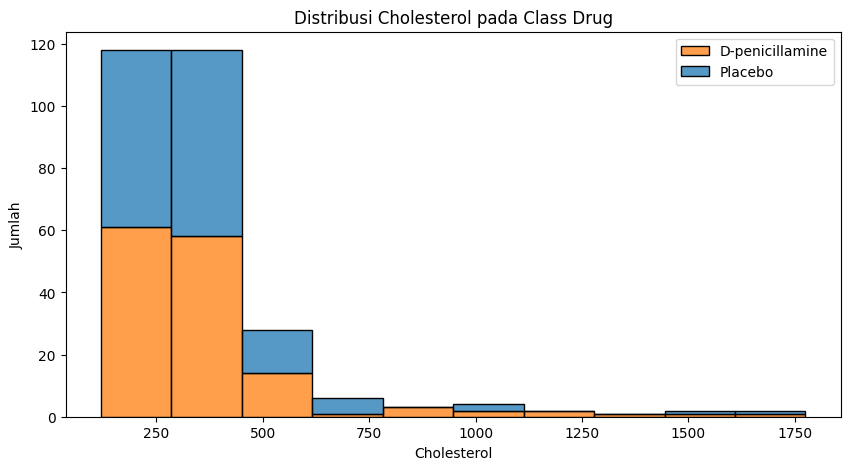

In [13]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="Cholesterol", hue="Drug", multiple="stack", kde=False, bins=10)

plt.title("Distribusi Cholesterol pada Class Drug")
plt.xlabel("Cholesterol")
plt.ylabel("Jumlah")
handles, labels = ax.get_legend_handles_labels()
custom_labels = ["D-penicillamine", "Placebo"]
plt.legend(custom_labels, title="")

plt.show()

#### Albumin

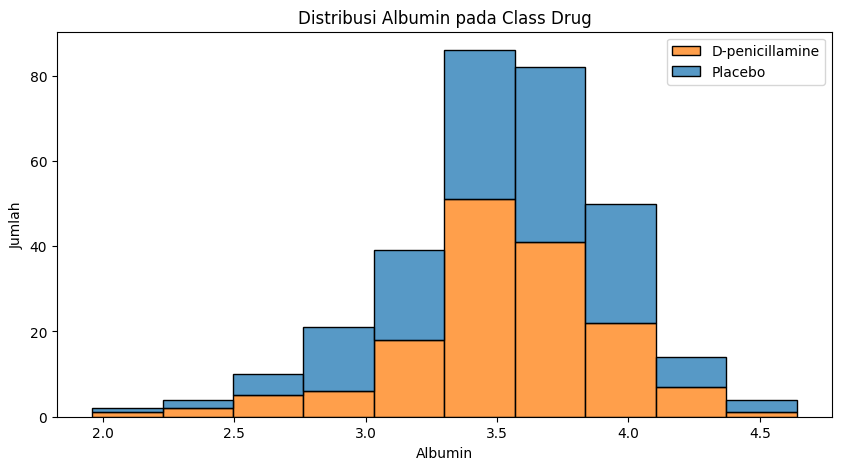

In [14]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="Albumin", hue="Drug", multiple="stack", kde=False, bins=10)

plt.title("Distribusi Albumin pada Class Drug")
plt.xlabel("Albumin")
plt.ylabel("Jumlah")
handles, labels = ax.get_legend_handles_labels()
custom_labels = ["D-penicillamine", "Placebo"]
plt.legend(custom_labels, title="")

plt.show()

#### Copper

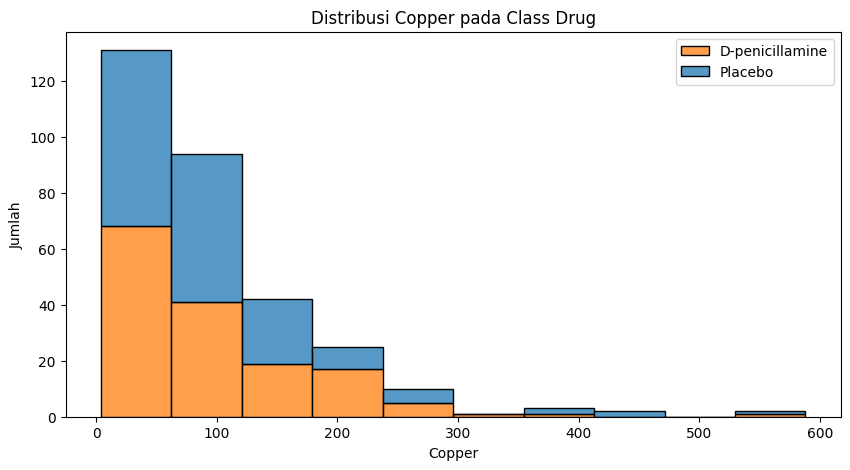

In [15]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="Copper", hue="Drug", multiple="stack", kde=False, bins=10)

plt.title("Distribusi Copper pada Class Drug")
plt.xlabel("Copper")
plt.ylabel("Jumlah")
handles, labels = ax.get_legend_handles_labels()
custom_labels = ["D-penicillamine", "Placebo"]
plt.legend(custom_labels, title="")

plt.show()

#### Alk_Phos

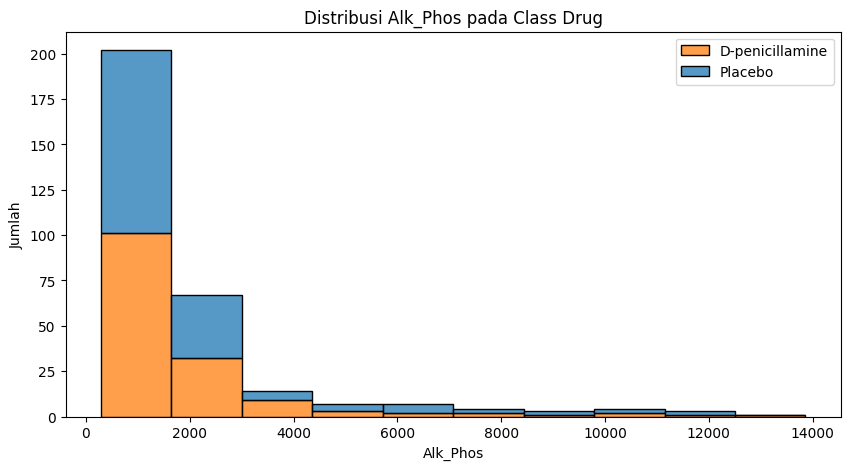

In [16]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="Alk_Phos", hue="Drug", multiple="stack", kde=False, bins=10)

plt.title("Distribusi Alk_Phos pada Class Drug")
plt.xlabel("Alk_Phos")
plt.ylabel("Jumlah")
handles, labels = ax.get_legend_handles_labels()
custom_labels = ["D-penicillamine", "Placebo"]
plt.legend(custom_labels, title="")

plt.show()

#### SGOT

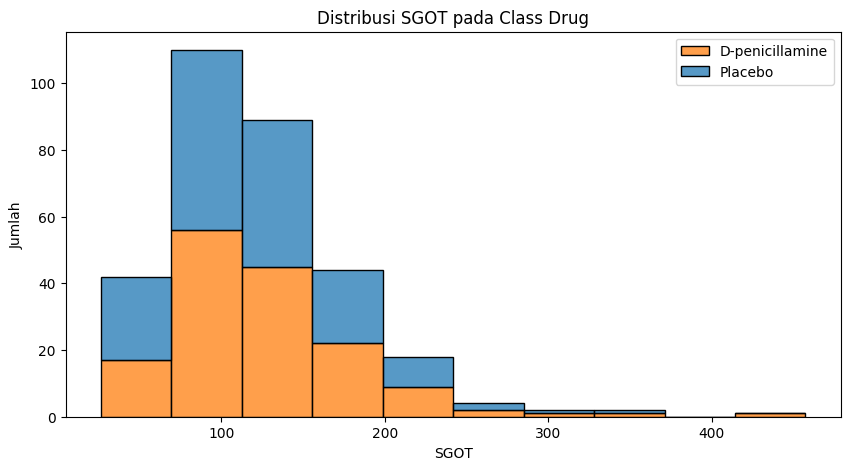

In [17]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="SGOT", hue="Drug", multiple="stack", kde=False, bins=10)

plt.title("Distribusi SGOT pada Class Drug")
plt.xlabel("SGOT")
plt.ylabel("Jumlah")
handles, labels = ax.get_legend_handles_labels()
custom_labels = ["D-penicillamine", "Placebo"]
plt.legend(custom_labels, title="")

plt.show()

#### Tryglicerides

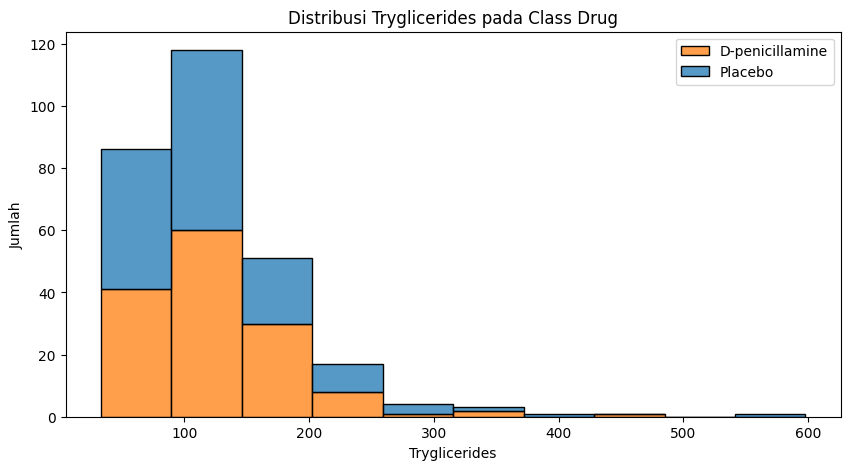

In [18]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="Tryglicerides", hue="Drug", multiple="stack", kde=False, bins=10)

plt.title("Distribusi Tryglicerides pada Class Drug")
plt.xlabel("Tryglicerides")
plt.ylabel("Jumlah")
handles, labels = ax.get_legend_handles_labels()
custom_labels = ["D-penicillamine", "Placebo"]
plt.legend(custom_labels, title="")

plt.show()

#### Platelets

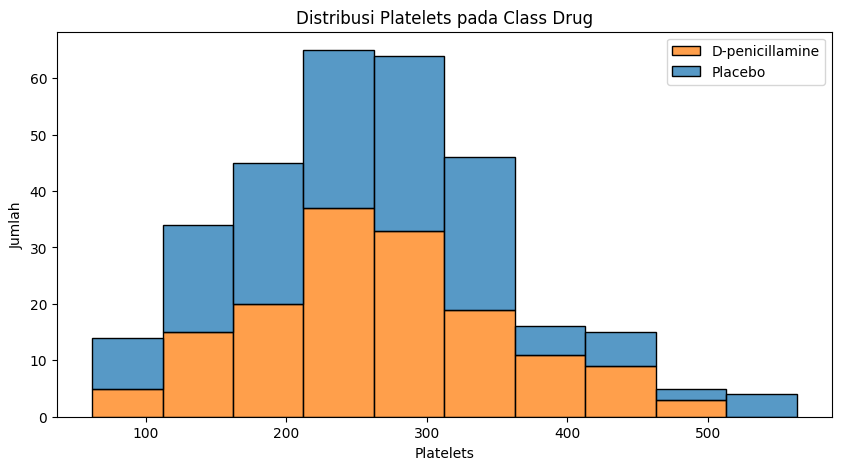

In [19]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="Platelets", hue="Drug", multiple="stack", kde=False, bins=10)

plt.title("Distribusi Platelets pada Class Drug")
plt.xlabel("Platelets")
plt.ylabel("Jumlah")
handles, labels = ax.get_legend_handles_labels()
custom_labels = ["D-penicillamine", "Placebo"]
plt.legend(custom_labels, title="")

plt.show()

#### Prothrombin

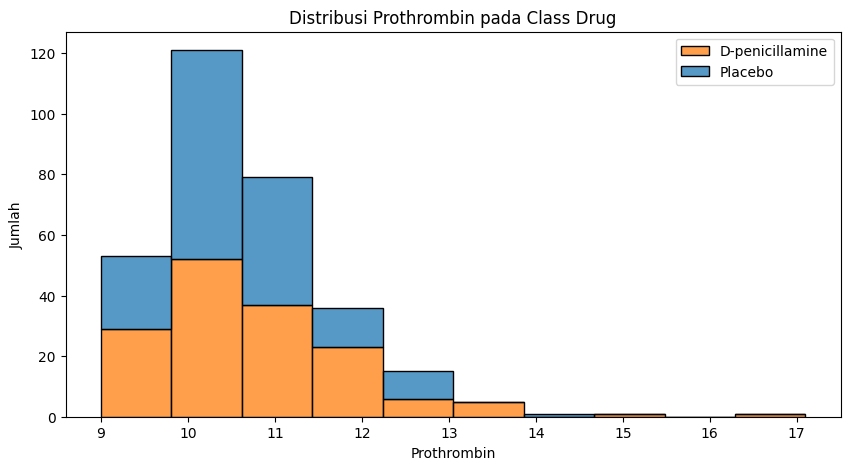

In [20]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="Prothrombin", hue="Drug", multiple="stack", kde=False, bins=10)

plt.title("Distribusi Prothrombin pada Class Drug")
plt.xlabel("Prothrombin")
plt.ylabel("Jumlah")
handles, labels = ax.get_legend_handles_labels()
custom_labels = ["D-penicillamine", "Placebo"]
plt.legend(custom_labels, title="")

plt.show()

#### Stage

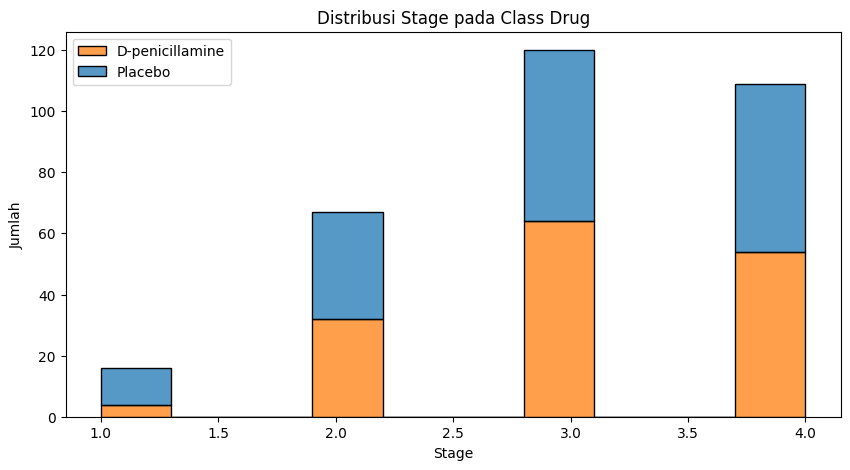

In [21]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="Stage", hue="Drug", multiple="stack", kde=False, bins=10)

plt.title("Distribusi Stage pada Class Drug")
plt.xlabel("Stage")
plt.ylabel("Jumlah")
handles, labels = ax.get_legend_handles_labels()
custom_labels = ["D-penicillamine", "Placebo"]
plt.legend(custom_labels, title="")

plt.show()

## Data Prepocessing

### Deteksi Outlier

#### Menentukan Encudian Distance

In [24]:
var_merged = df

feature_column = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
                  'Prothrombin', 'Stage']

X = var_merged[feature_column]

X_filled = X.fillna(X.mean())

nilai_k = 5
knn = NearestNeighbors(n_neighbors=nilai_k, metric='euclidean')
knn.fit(X_filled)
distances, _ = knn.kneighbors(X_filled)
df_features = pd.DataFrame(X_filled, columns=feature_column)
df_features['euclidean_distance'] = distances.mean(axis=1)

var_merged['euclidean_distance'] = df_features['euclidean_distance']

print("Hasil dari perhitungan jarak menggunakan Euclidean:")
print(tabulate(df_features[feature_column + ['euclidean_distance']], headers="keys", tablefmt="grid"))


Hasil dari perhitungan jarak menggunakan Euclidean:
+-----+-------+-------------+---------------+-----------+----------+------------+---------+-----------------+-------------+---------------+---------+----------------------+
|     |   Age |   Bilirubin |   Cholesterol |   Albumin |   Copper |   Alk_Phos |    SGOT |   Tryglicerides |   Platelets |   Prothrombin |   Stage |   euclidean_distance |
+=====+=======+=============+===============+===========+==========+============+=========+=================+=============+===============+=========+======================+
|   0 | 21464 |        14.5 |       261     |      2.6  | 156      |    1718    | 137.95  |         172     |     190     |       12.2    | 4       |             210.5    |
+-----+-------+-------------+---------------+-----------+----------+------------+---------+-----------------+-------------+---------------+---------+----------------------+
|   1 | 20617 |         1.1 |       302     |      4.14 |  54      |    7394.8  | 1

#### Menghapus Data Outlier dan Data NaN

In [31]:
def remove_outliers(df):
    Q1 = df['euclidean_distance'].quantile(0.25)
    Q3 = df['euclidean_distance'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask_outlier = (df['euclidean_distance'] >= lower_bound) & (df['euclidean_distance'] <= upper_bound)
    mask_nan = ~df.isna().any(axis=1)

    final_mask = mask_outlier & mask_nan

    return df[final_mask]

clean_var_merged = remove_outliers(var_merged)

print(f"Jumlah data setelah cleaning = {clean_var_merged.shape[0]}")
print("="*100)
print(tabulate(clean_var_merged, headers='keys', tablefmt='grid'))


Jumlah data setelah cleaning = 223
+-----+------+----------+----------+-----------------+-------+-------+-----------+----------------+-----------+---------+-------------+---------------+-----------+----------+------------+--------+-----------------+-------------+---------------+---------+----------------------+
|     |   ID |   N_Days | Status   | Drug            |   Age | Sex   | Ascites   | Hepatomegaly   | Spiders   | Edema   |   Bilirubin |   Cholesterol |   Albumin |   Copper |   Alk_Phos |   SGOT |   Tryglicerides |   Platelets |   Prothrombin |   Stage |   euclidean_distance |
+=====+======+==========+==========+=================+=======+=======+===========+================+===========+=========+=============+===============+===========+==========+============+========+=================+=============+===============+=========+======================+
|   0 |    1 |      400 | D        | D-penicillamine | 21464 | F     | Y         | Y              | Y         | Y       |        14

## Klasifikasi Naive Bayes

### Class Naive Bayes untuk Perhitungan

In [32]:
class NaiveBayes:
    def __init__(self, dataset):
        self.dataset = dataset
        self.separated = self.separate_by_class(dataset)
        self.summaries = self.mean_std_by_class(self.separated)
        self.priors = self.prior_probabilities(dataset)

    def separate_by_class(self, dataset):
        separated = {}
        for row in dataset:
            class_value = row[0]
            if class_value not in separated:
                separated[class_value] = []
            separated[class_value].append(row[1:])
        return {key: np.array(value) for key, value in separated.items()}

    def mean_std_by_class(self, separated):
        summaries = {}
        for class_value, instances in separated.items():
            summaries[class_value] = [(np.mean(col), np.std(col) if np.std(col) > 0 else 1e-6) for col in instances.T]
        print(summaries)
        return summaries

    def prior_probabilities(self, dataset):
        total_count = len(dataset)
        class_counts = {label: sum(dataset[:, 0] == label) for label in np.unique(dataset[:, 0])}
        return {label: class_counts[label] / total_count for label in class_counts}

    def gaussian_probability(self, x, mean, std):
        exponent = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

    def calculate_likelihoods(self, input_features):
        likelihoods = {}
        for class_value, class_summaries in self.summaries.items():
            likelihoods[class_value] = []
            for i in range(len(class_summaries)):
                mean, std = class_summaries[i]
                prob = self.gaussian_probability(input_features[i], mean, std)
                likelihoods[class_value].append(prob)
        return likelihoods

    def calculate_posterior(self, input_features, likelihoods):
        probabilities = {}
        for class_value in self.summaries.keys():
            probabilities[class_value] = self.priors[class_value]
            for prob in likelihoods[class_value]:
                probabilities[class_value] *= prob
        return probabilities

    def predict(self, input_features):
        likelihoods = self.calculate_likelihoods(input_features)
        probabilities = self.calculate_posterior(input_features, likelihoods)
        return max(probabilities, key=probabilities.get)

    def get_predictions(self):
        return [self.predict(row[1:]) for row in self.dataset]

    def accuracy(self, predictions):
        correct = sum(1 for i in range(len(self.dataset)) if self.dataset[i][0] == predictions[i])
        return correct / len(self.dataset) * 100

### Buat Objek Menggunakan Class

In [33]:
data = clean_var_merged
feature_column = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
                  'Prothrombin', 'Stage']
X = data[feature_column].to_numpy()
y = data['Drug'].to_numpy()
dataset = np.column_stack((y, X))

nb_model = NaiveBayes(dataset)
predictions = nb_model.get_predictions()
acc = nb_model.accuracy(predictions)

{'D-penicillamine': [(np.float64(18529.694444444445), np.float64(3731.110202315255)), (np.float64(2.7888888888888883), np.float64(3.5605693815719492)), (np.float64(334.51851851851853), np.float64(120.21388974113637)), (np.float64(3.517037037037039), np.float64(0.43961317014961987)), (np.float64(100.78703703703704), np.float64(98.12558571902811)), (np.float64(1244.8703703703704), np.float64(558.823567409657)), (np.float64(118.97962962962963), np.float64(50.772849279284095)), (np.float64(123.62037037037037), np.float64(77.26538173514473)), (np.float64(259.0462962962963), np.float64(93.80825442035305)), (np.float64(10.59351851851852), np.float64(0.8526943297732398)), (np.float64(2.9722222222222223), np.float64(0.8867160944173538))], 'Placebo': [(np.float64(17666.182608695653), np.float64(3504.0654961682258)), (np.float64(2.6791304347826093), np.float64(3.618274766699538)), (np.float64(317.02608695652174), np.float64(118.10028611455716)), (np.float64(3.5546956521739137), np.float64(0.37217

### Probabilitas Prior

In [34]:
print("Prior Probabilities:", nb_model.priors)

Prior Probabilities: {'D-penicillamine': np.float64(0.484304932735426), 'Placebo': np.float64(0.515695067264574)}


### Menghitung Nilai Mean dan Variansi

In [35]:
for class_value, class_summaries in nb_model.summaries.items():
    print(f"Class {class_value}:")
    for i, (mean, std) in enumerate(class_summaries):
        print(f"  Feature {i}: Mean = {mean:.2f}, Variance = {std**2:.2f}")

Class D-penicillamine:
  Feature 0: Mean = 18529.69, Variance = 13921183.34
  Feature 1: Mean = 2.79, Variance = 12.68
  Feature 2: Mean = 334.52, Variance = 14451.38
  Feature 3: Mean = 3.52, Variance = 0.19
  Feature 4: Mean = 100.79, Variance = 9628.63
  Feature 5: Mean = 1244.87, Variance = 312283.78
  Feature 6: Mean = 118.98, Variance = 2577.88
  Feature 7: Mean = 123.62, Variance = 5969.94
  Feature 8: Mean = 259.05, Variance = 8799.99
  Feature 9: Mean = 10.59, Variance = 0.73
  Feature 10: Mean = 2.97, Variance = 0.79
Class Placebo:
  Feature 0: Mean = 17666.18, Variance = 12278475.00
  Feature 1: Mean = 2.68, Variance = 13.09
  Feature 2: Mean = 317.03, Variance = 13947.68
  Feature 3: Mean = 3.55, Variance = 0.14
  Feature 4: Mean = 86.64, Variance = 4647.71
  Feature 5: Mean = 1276.63, Variance = 299965.94
  Feature 6: Mean = 119.10, Variance = 2462.25
  Feature 7: Mean = 117.44, Variance = 2528.59
  Feature 8: Mean = 260.60, Variance = 7440.69
  Feature 9: Mean = 10.77, Va

### Menghitung Nilai Likelihood

In [36]:
for i, row in enumerate(dataset):
    likelihoods = nb_model.calculate_likelihoods(row[1:])
    print(f"\nData {i+1}: class = {row[0]}")
    print(f"data column = {row[1:]}")
    print(f"Likelihoods: {likelihoods}")


Data 1: class = D-penicillamine
data column = [21464.0 14.5 261.0 2.6 156.0 1718.0 137.95 172.0 190.0 12.2 4.0]
Likelihoods: {'D-penicillamine': [np.float64(7.848163178270601e-05), np.float64(0.0005014595872030796), np.float64(0.0027525802735562013), np.float64(0.1030238003860734), np.float64(0.0034703871844284184), np.float64(0.0004988610512730349), np.float64(0.007327647287440375), np.float64(0.0042441414290614946), np.float64(0.003243616957188132), np.float64(0.07931529908853142), np.float64(0.22982316619145832)], 'Placebo': [np.float64(6.327860413040071e-05), np.float64(0.0005305748192964519), np.float64(0.0030184929591205146), np.float64(0.039931181152474), np.float64(0.0034877521965299336), np.float64(0.0005264471585447193), np.float64(0.007480129019784048), np.float64(0.004404189382080583), np.float64(0.0033085760406882394), np.float64(0.15951016031871057), np.float64(0.2704589131180688)]}

Data 2: class = D-penicillamine
data column = [25594.0 1.4 176.0 3.48 210.0 516.0 96.1 5

### Menghitung Nilai Posterior Setiap Class pada Masing-Masing Data

In [37]:
for i, row in enumerate(dataset):
    posteriors = nb_model.calculate_posterior(row[1:], likelihoods)
    print(f"\nData {i+1}: class = {row[0]}")
    print(f"Posterior Probabilities: {posteriors}")


Data 1: class = D-penicillamine
Posterior Probabilities: {'D-penicillamine': np.float64(2.1930436329152967e-24), 'Placebo': np.float64(1.5878646081818236e-24)}

Data 2: class = D-penicillamine
Posterior Probabilities: {'D-penicillamine': np.float64(2.1930436329152967e-24), 'Placebo': np.float64(1.5878646081818236e-24)}

Data 3: class = Placebo
Posterior Probabilities: {'D-penicillamine': np.float64(2.1930436329152967e-24), 'Placebo': np.float64(1.5878646081818236e-24)}

Data 4: class = Placebo
Posterior Probabilities: {'D-penicillamine': np.float64(2.1930436329152967e-24), 'Placebo': np.float64(1.5878646081818236e-24)}

Data 5: class = D-penicillamine
Posterior Probabilities: {'D-penicillamine': np.float64(2.1930436329152967e-24), 'Placebo': np.float64(1.5878646081818236e-24)}

Data 6: class = Placebo
Posterior Probabilities: {'D-penicillamine': np.float64(2.1930436329152967e-24), 'Placebo': np.float64(1.5878646081818236e-24)}

Data 7: class = Placebo
Posterior Probabilities: {'D-peni

### Melakukan Predict dari Setiap Perhitungan Pada Class

In [38]:
for i, row in enumerate(dataset):
    likelihoods = nb_model.calculate_likelihoods(row[1:])
    print(f"\nData {i+1}: class = {row[0]}")
    print(f"data column = {row[1:]}")
    print(f"Predicted = {predictions[i]}")


Data 1: class = D-penicillamine
data column = [21464.0 14.5 261.0 2.6 156.0 1718.0 137.95 172.0 190.0 12.2 4.0]
Predicted = Placebo

Data 2: class = D-penicillamine
data column = [25594.0 1.4 176.0 3.48 210.0 516.0 96.1 55.0 151.0 12.0 4.0]
Predicted = D-penicillamine

Data 3: class = Placebo
data column = [13918.0 3.4 279.0 3.53 143.0 671.0 113.15 72.0 136.0 10.9 3.0]
Predicted = Placebo

Data 4: class = Placebo
data column = [20284.0 1.0 322.0 4.09 52.0 824.0 60.45 213.0 204.0 9.7 3.0]
Predicted = D-penicillamine

Data 5: class = D-penicillamine
data column = [15526.0 3.2 562.0 3.08 79.0 2276.0 144.15 88.0 251.0 11.0 2.0]
Predicted = Placebo

Data 6: class = Placebo
data column = [25772.0 12.6 200.0 2.74 140.0 918.0 147.25 143.0 302.0 11.5 4.0]
Predicted = D-penicillamine

Data 7: class = Placebo
data column = [19619.0 1.4 259.0 4.16 46.0 1104.0 79.05 79.0 258.0 12.0 4.0]
Predicted = Placebo

Data 8: class = Placebo
data column = [21600.0 3.6 236.0 3.52 94.0 591.0 82.15 95.0 71.0 13

### Nilai Akurasi Setiap Data

In [39]:
accuracy = acc
print(f"nilai akurasi = {accuracy:.2f}%")

nilai akurasi = 57.40%


## Evaluasi Data

Data di atas memiliki nilai akurasi yang sangat rendah yakni 57.40 ketika menggunakan class berdasarkan jenis Drug nya. Kemungkinan setiap data memmiliki nilai interval atau variansi yang hampir sama sehingga menentukan dalam proses predict untuk setiap datanya.